# SI 618 Homework 5 - Natural Language Processing

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. Questions 1 through 6 are worth 10 points each; Question 7 is worth 20 points.

Version 2024.02.20.CT

## Background

Recently on September 10th, 2024, there was the first U.S. Presidential Debate between two candidates, Former President Donald J. Trump and current Vice President Kamala Harris. 

The debate was hosted by ABC News and moderated by David Muir and Linsey Davis. This debate was held in Philadelphia, Pennsylvania in a closed room setting but aired on national television. At a time where the Presidential Election is justt around the corner and has a domestic and international spotlight on it, thhis homework will focus on how to analyze the text data from recent news sources.

There are two sources of the debate transcript that are provided for this homnework. The main and primary source of the debate transcript is from The American Presidency Project at the University of California, Santa Barbara. The secondary source is from the ABC News website.


- Link: https://www.presidency.ucsb.edu/documents/presidential-debate-philadelphia-pennsylvania
- Link: https://abcnews.go.com/Politics/harris-trump-presidential-debate-transcript/story?id=113560542

## Learning Objectives

In this homework, you will practice the following skills:

- Getting Comfortable working with text data
- Preprocessing techniques for text data
- Using regular expressions to extract information from text data.
- Tokenizing text data
- Word filtering (stop words, punctuation, etc.)
- Understanding the basics of Natural Language Processing (NLP)
- Introduction to embeddings
- Using embeddings to analyze text data
    - Similarity
    - Distance


## 📂 Data

The teaching team has provided two text files for this homework. We will only be using one of them for this assignment. 

- The file from the **American Presidency Project** is the primary source of data and is named **"Full_Transcript.txt"**.
- The other file, from the **ABC News** website, is a partial transcript called **"Partial_Debate_Transcript.txt"**.

###  Homework Focus:
In this homework, you will work on skills that provide the groundwork for understanding and analyzing text data.

### Extra Resource:
The partial debate transcript is provided as an extra resource. **It is not required for this homework**, but feel free to explore it after completing the assignment.

### Question for Reflection:
Consider the following question:  
*"What is the impact of cherry-picked data? Do you think that a partial transcript can provide the whole truth of a debate, even if selectively chosen?"*

Please fill in your uniqname in the next code cell:

In [2]:
MY_UNIQNAME = "jonasxie"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from langchain_huggingface import HuggingFaceEmbeddings
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## **Q0** - Setting Up Data Structure for Text Processing

For this question, the desired output is to create a **2-column DataFrame** with the following columns:
- **Column 1**: Speaker
- **Column 2**: Text

### Task:
Please create a 2-column DataFrame using the data from the **"Full_Transcript.txt"** file.

In [4]:
# Read in the full_transcript file
with open('Full_Transcript.txt', 'r', encoding='latin1') as f:
    transcript = f.read()

# Split the whole transcript into lines by the speaker
lines = re.split(r'(?=TRUMP|HARRIS|DAVIS|MUIR:)', transcript)[1:]
lines[-1] = lines[-1].split('\n',1)[0]
lines = [line.strip() for line in lines]

# Split the lines into speaker and text
speaker = []
text = []
for line in lines:
    speaker.append(line.split(':', 1)[0])
    text.append(line.split(':', 1)[1])

# Store the speaker and text into a DataFrame
transcript_df = pd.DataFrame({'Speaker': speaker, 'Text': text})
transcript_df.head(5)

,Speaker,Text
0,MUIR,"Good evening, I'm David Muir. And thank you f..."
1,DAVIS,And I'm Linsey Davis. Tonight's meeting could...
2,MUIR,And that brings us to the rules of tonight's ...
3,DAVIS,President Trump won the coin toss. He chose t...
4,MUIR,So let's now welcome the candidates to the st...


## **Q1.**

### Tokenization of the Text
- The teaching team would like to emphasize the skill of **tokenization** of the text data.
- **Tokenization** is the process of breaking down text data into smaller units, such as **words** or **phrases**.
- We will use the `split()` method to tokenize the text data.
- Using the `split()` method, please tokenize the text data for each **candidate** and **moderator**.
- Store each in separate data structures for each candidate and moderator, along with one for the **full transcript**.

In [5]:
transcript_df['Token'] = transcript_df['Text'].str.split()
trump_df = transcript_df[transcript_df['Speaker'] == 'TRUMP']
harris_df = transcript_df[transcript_df['Speaker'] == 'HARRIS']
davis_df = transcript_df[transcript_df['Speaker'] == 'DAVIS']
muir_df = transcript_df[transcript_df['Speaker'] == 'MUIR']

You may notice some irregularitites in the output of the text data, Over the next several steps we will clean the text data to make it more readable and easier to analyze.

### Lower all of the text data
The next step in the NLP pipeline is to lower all of the text data. This is important because it will allow us to standardize the text data and make it easier to analyze. In this step we would like you to define a function that can be used to lower all of the text data.

In [6]:
# lower all of the text data
for df in [transcript_df, trump_df, harris_df, davis_df, muir_df]:
    df['text_process'] = df['Text'].str.lower()
    df['Token'] = df['Token'].apply(lambda x: [word.lower() for word in x])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\142356609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_process'] = df['Text'].str.lower()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\142356609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token'] = df['Token'].apply(lambda x: [word.lower() for word in x])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\142356609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Remove Punctuation from the Text
The next step in the NLP pipeline is to remove punctuation from the text data. This is another important step as it moves towards more standardization of the text data. In this step, we would like you to define a function that can be used to remove punctuation from the text data.

In [7]:
# Define a function that be used to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Remove the punctuation from the text
for df in [transcript_df, trump_df, harris_df, davis_df, muir_df]:
    df['text_process'] = df['text_process'].apply(remove_punctuation)
    df['Token'] = df['Token'].apply(lambda x: [remove_punctuation(word) for word in x])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\1318639665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_process'] = df['text_process'].apply(remove_punctuation)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\1318639665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token'] = df['Token'].apply(lambda x: [remove_punctuation(word) for word in x])


### Remove stopwords from the text
- The next step in the NLP pipeline is to remove stopwords from the text data. Stopwords are common words that do not provide much information about the text data. In this step we would like you to define a function that can be used to remove stopwords from the text data.
- The teaching team has provided a list of stopwords that you can use for this step. The stopwords can be found in the stopwords.txt file.
- To summarize, please load the stopwords.txt file and use it to remove stopwords from the text data (make use of a function for removing the stopwords).

In [8]:
# Import the stopwords list from stopwords.txt
with open('stopwords.txt', 'r') as f:
    stopwords = f.read().splitlines()

# Define a function that be used to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

# Remove the stopwords from the text
for df in [transcript_df, trump_df, harris_df, davis_df, muir_df]:
    df['text_process'] = df['text_process'].apply(remove_stopwords)
    df['Token'] = df['Token'].apply(lambda x: [word for word in x if word not in stopwords])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3838769174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_process'] = df['text_process'].apply(remove_stopwords)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3838769174.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token'] = df['Token'].apply(lambda x: [word for word in x if word not in stopwords])


### 🏷️ POS Tagging the Text

The next step in our NLP pipeline is **Part-of-Speech (POS) tagging**.

### What is POS Tagging?
- **POS tagging** is the process of marking each word in a text with its corresponding **part of speech** based on its **definition** and **context**.
  
- Examples:  
  - **Noun**: *"dog"*, *"city"*  
  - **Verb**: *"run"*, *"write"*  
  - **Adjective**: *"happy"*, *"blue"*

### Task:
Use the **NLTK library** to perform **POS tagging** on the text data.

In [9]:
# Use NLTK to perform pos tagging
for df in [transcript_df, trump_df, harris_df, davis_df, muir_df]:
    df['POS'] = df['Token'].apply(pos_tag)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3180491654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'] = df['Token'].apply(pos_tag)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3180491654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'] = df['Token'].apply(pos_tag)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3180491654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

### Lemmatization of the Text

The final step in our NLP pipeline is **lemmatization**.

### What is Lemmatization?
- **Lemmatization** groups together the **inflected forms** of a word, so they can be analyzed as a **single item**.  
- Example:  
  - *"running"* → **"run"**

### Task:
Define a function using the **NLTK library** to lemmatize the text data.

🔗 **Hint**: Use NLTK’s `WordNetLemmatizer` for this process.

In [10]:
# Use NLTK to lemmatize the text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)


for df in [transcript_df, trump_df, harris_df, davis_df, muir_df]:
    df['text_process'] = df['text_process'].apply(lemmatize_text) # Lemmatize the text
    df['Token'] = df['Token'].apply(lambda x: [lemmatize_text(word) for word in x]) # Lemmatize tokens

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\1541141883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_process'] = df['text_process'].apply(lemmatize_text) # Lemmatize the text
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\1541141883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token'] = df['Token'].apply(lambda x: [lemmatize_text(word) for word in x]) # Lemmatize tokens


In [11]:
# Examine the lemamtized text
trump_df.head(5)

,Speaker,Text,Token,text_process,POS
6,TRUMP,Nice to see you. Have fun.,"[nice, fun]",nice fun,"[(nice, JJ), (fun, NN)]"
8,TRUMP,Thank you.,[],,[]
14,TRUMP,"First of all, I have no sales tax. That's an ...","[sale, tax, incorrect, statement, tariff, coun...",sale tax incorrect statement tariff country co...,"[(sales, NNS), (tax, NN), (incorrect, JJ), (st..."
18,TRUMP,"Number one, I have nothing to do, as you know...","[number, project, 2025, havent, read, dont, wa...",number project 2025 havent read dont wan na re...,"[(number, NN), (project, NN), (2025, CD), (hav..."
21,TRUMP,That's just a sound bite. They gave her that ...,"[sound, bite, gave, wharton, school, finance, ...",sound bite gave wharton school finance profess...,"[(sound, JJ), (bite, RB), (gave, VBD), (wharto..."


In [12]:
harris_df.head(5)

,Speaker,Text,Token,text_process,POS
5,HARRIS,Kamala Harris. Let's have a good debate.,"[kamala, harris, let, good, debate]",kamala harris let good debate,"[(kamala, NN), (harris, NN), (lets, NNS), (goo..."
7,HARRIS,Thank you.,[],,[]
12,HARRIS,"So, I was raised as a middle-class kid. And I...","[raised, middleclass, kid, person, stage, plan...",raised middleclass kid person stage plan lifti...,"[(raised, VBN), (middleclass, NN), (kid, NN), ..."
16,HARRIS,"Well, I would love to. Let's talk about what ...","[love, let, talk, donald, trump, left, donald,...",love let talk donald trump left donald trump l...,"[(love, NN), (lets, VBZ), (talk, VBP), (donald..."
20,HARRIS,"So, Donald Trump has no plan for you. And whe...","[donald, trump, plan, economic, plan, tax, bre...",donald trump plan economic plan tax break rich...,"[(donald, NNS), (trump, VBD), (plan, JJ), (eco..."


## **Q2.** Word Usage Analysis by Candidate and Moderator

### Key Questions:
1. **How many words** did each **candidate** use in the debate?  
   - *(Excluding stopwords)*

2. **How many **unique words** did each **moderator** use in the debate?  
   - *(Excluding stopwords)*

### Analysis Focus:
- **Candidates**: Calculate **total word count**.
- **Moderators**: Calculate **unique word count**.

In [13]:
# Calculate the total word count for trump_df
trump_word_count = trump_df['Token'].apply(len).sum()
print(f"The total word count for Trump is: {trump_word_count}")

# Calculate the total word count for harris_df
harris_word_count = harris_df['Token'].apply(len).sum()
print(f"The total word count for Harris is: {harris_word_count}")

# Calculate the total unique word count for muir_df
muir_unique_word_count = len(set(muir_df['Token'].sum()))
print(f"The total unique word count for Muir is: {muir_unique_word_count}")

# Calculate the total unique word count for davis_df
davis_unique_word_count = len(set(davis_df['Token'].sum()))
print(f"The total unique word count for Davis is: {davis_unique_word_count}")

The total word count for Trump is: 2803
The total word count for Harris is: 2319
The total unique word count for Muir is: 370
The total unique word count for Davis is: 213


## **Q3.** Counting Speaking Turns for Each Candidate and Moderator

### What is a "Turn"?
- A **turn** is defined as an **uninterrupted period of speech**.  
  For example:
  
  > Chris: Big data is really interesting.  
  > Colleague: Actually, it's a bit boring.  
  > Chris: Really? Why would you say that?  
  > Colleague: Your choice of tools is really limited.  
  > Colleague: I mean, you're basically stuck with Spark, right?  
  > Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In this example, **Chris** had 3 turns, while his **Colleague** had 2.

### Desired Output:
Format your results using a **DataFrame** with the following columns:

- **Speaker**  
- **Uninterrupted_Turns**

In [14]:
# Calculate the turns for each speaker
transcript_df['turn'] = transcript_df['Speaker']!=transcript_df['Speaker'].shift(1)
speaker_turns = transcript_df.groupby('Speaker')['turn'].sum()
speaker_turns_df = speaker_turns.reset_index()
speaker_turns_df.columns = ['Speaker', 'Uninterrupted_Turns']

## **Q4.** Analyzing Noun Usage by Each Speaker

### Task:
Calculate the **number of different nouns** used by each speaker in the debates.

### Format:
Present your answer using a **dictionary** in the following format:

```python
{
    'DAVID MUIR': 0, 
    'LINSEY DAVIS': 0, 
    'FORMER PRESIDENT DONALD TRUMP': 0, 
    'VICE PRESIDENT KAMALA HARRIS': 0
}

In [15]:
trump_df.head(5)

,Speaker,Text,Token,text_process,POS
6,TRUMP,Nice to see you. Have fun.,"[nice, fun]",nice fun,"[(nice, JJ), (fun, NN)]"
8,TRUMP,Thank you.,[],,[]
14,TRUMP,"First of all, I have no sales tax. That's an ...","[sale, tax, incorrect, statement, tariff, coun...",sale tax incorrect statement tariff country co...,"[(sales, NNS), (tax, NN), (incorrect, JJ), (st..."
18,TRUMP,"Number one, I have nothing to do, as you know...","[number, project, 2025, havent, read, dont, wa...",number project 2025 havent read dont wan na re...,"[(number, NN), (project, NN), (2025, CD), (hav..."
21,TRUMP,That's just a sound bite. They gave her that ...,"[sound, bite, gave, wharton, school, finance, ...",sound bite gave wharton school finance profess...,"[(sound, JJ), (bite, RB), (gave, VBD), (wharto..."


In [16]:
# Calculate the number of different nouns used by each speaker
from pprint import pp


def unique_noun_count(df):
    tokens = df['POS'].sum()
    nouns = [word for word, pos in tokens if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    return len(set(nouns))

trump_noun_count = unique_noun_count(trump_df)
harris_noun_count = unique_noun_count(harris_df)
davis_noun_count = unique_noun_count(davis_df)
muir_noun_count = unique_noun_count(muir_df)

# Save it into a dictionary
noun_count = {'FORMER PRESIDENT DONALD TRUMP': trump_noun_count, 
              'VICE PRESIDENT KAMALA HARRIS': harris_noun_count, 
              'LINSEY DAVIS': davis_noun_count,
              'DAVID MUIR': muir_noun_count}

pprint(noun_count)

{'DAVID MUIR': 228,
 'FORMER PRESIDENT DONALD TRUMP': 527,
 'LINSEY DAVIS': 132,
 'VICE PRESIDENT KAMALA HARRIS': 541}


## **Q5.** Analyzing Unique Words Used by Each Speaker

### Task:
- **Calculate the Number of Unique Words** for each candidate and moderator.
- Answer the following question:  
  - How many **unique words** did each person use in the debate?
  - What might this indicate about the **breadth of their vocabulary**?

### Considerations:
- Think about the **role** of the speaker:
  - Are they a **candidate** trying to present their ideas?
  - Or a **moderator** guiding the discussion?

### Visualization: Zipf's Law
- Create a **visualization** to depict **Zipf's Law** for each speaker, showing the relationship between word frequency and rank.

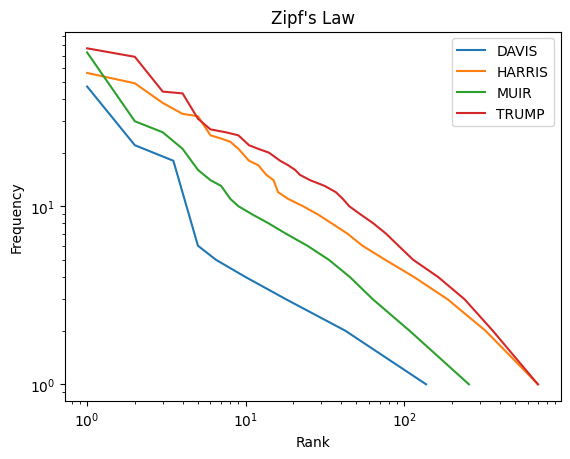

In [17]:
# Calculate the number of unique words for each speaker
grouped_tokens = transcript_df.groupby('Speaker')['Token'].sum()
unique_words = grouped_tokens.apply(lambda x: len(set(x)))
unique_words_df = unique_words.reset_index()
unique_words_df.columns = ['Speaker', 'Unique_Words_Count']
unique_words_df 

# Create a visualization for Zipf's Law for each speaker
for speaker, tokens in grouped_tokens.items():
    word_count = Counter(tokens)
    word_count_df = pd.DataFrame(word_count.items(), columns=['Word', 'Count'])
    word_count_df = word_count_df.sort_values('Count', ascending=False)
    word_count_df['Rank'] = word_count_df['Count'].rank(ascending=False)
    plt.plot(word_count_df['Rank'], word_count_df['Count'], label=speaker)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()

## **Q6.** Calculate Bigrams by Candidate and Moderator

Use **bigrams** (pairs of consecutive words) to analyze speech patterns for each candidate and the moderator.

### Task:
- Calculate **bigrams** separately for each candidate and the moderator.
- Present the **top 5 bigrams** for each speaker.

### Analysis Questions:
- Do you notice any **interesting patterns** or unique combinations of words?
- Are there specific phrases that are frequently used by a particular candidate?

In [18]:
# Calculate the bigrams for each speaker
for df in [trump_df, harris_df, davis_df, muir_df]:
    df['Bigrams'] = df['Token'].apply(lambda x: list(bigrams(x)))

# List the top 5 bigrams for each speaker
trump_top_bigrams = Counter(trump_df['Bigrams'].sum()).most_common(5)
harris_top_bigrams = Counter(harris_df['Bigrams'].sum()).most_common(5)
davis_top_bigrams = Counter(davis_df['Bigrams'].sum()).most_common(5)
muir_top_bigrams = Counter(muir_df['Bigrams'].sum()).most_common(5)

print("Top 5 bigrams for Trump:")
pprint(trump_top_bigrams)
print("\n")
print("Top 5 bigrams for Harris:")
pprint(harris_top_bigrams)
print("\n")
print("Top 5 bigrams for Davis:")
pprint(davis_top_bigrams)
print("\n")
print("Top 5 bigrams for Muir:")
pprint(muir_top_bigrams)

Top 5 bigrams for Trump:
[(('million', 'people'), 11),
 (('billion', 'dollar'), 7),
 (('year', 'ago'), 7),
 (('country', 'theyre'), 7),
 (('history', 'country'), 7)]


Top 5 bigrams for Harris:
[(('donald', 'trump'), 32),
 (('united', 'state'), 20),
 (('american', 'people'), 18),
 (('vice', 'president'), 10),
 (('president', 'united'), 8)]


Top 5 bigrams for Davis:
[(('president', 'trump'), 21),
 (('vice', 'president'), 18),
 (('president', 'harris'), 17),
 (('climate', 'change'), 3),
 (('im', 'linsey'), 2)]


Top 5 bigrams for Muir:
[(('vice', 'president'), 30),
 (('president', 'harris'), 24),
 (('president', 'trump'), 17),
 (('mr', 'president'), 13),
 (('abc', 'news'), 6)]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3257571994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bigrams'] = df['Token'].apply(lambda x: list(bigrams(x)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3257571994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bigrams'] = df['Token'].apply(lambda x: list(bigrams(x)))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\3257571994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

## **Q7.** Word Frequency Histogram

Create a **word frequency histogram** for each candidate and the moderator.

###  Analysis Questions:
- Do you observe any **interesting patterns**?
- Choose an **arbitrary word count threshold** and **remove** all words with a frequency **lower** than that threshold.
  
### Updated Histogram:
- Create a **new histogram** using the updated data.

###  Additional Insight:
- Since this is a **political debate**, identify any **rare words** that might be of interest.
- Do any moderators or candidates use **complex vocabulary**? If so, which ones?


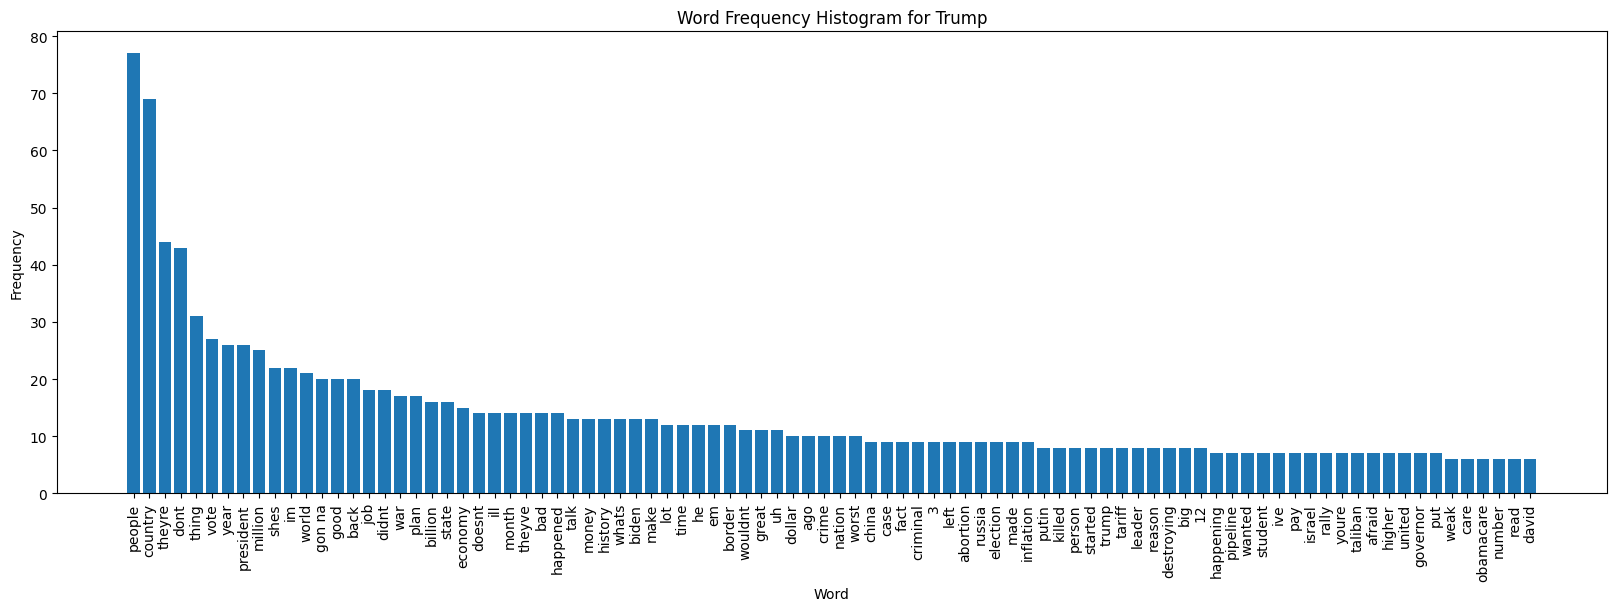

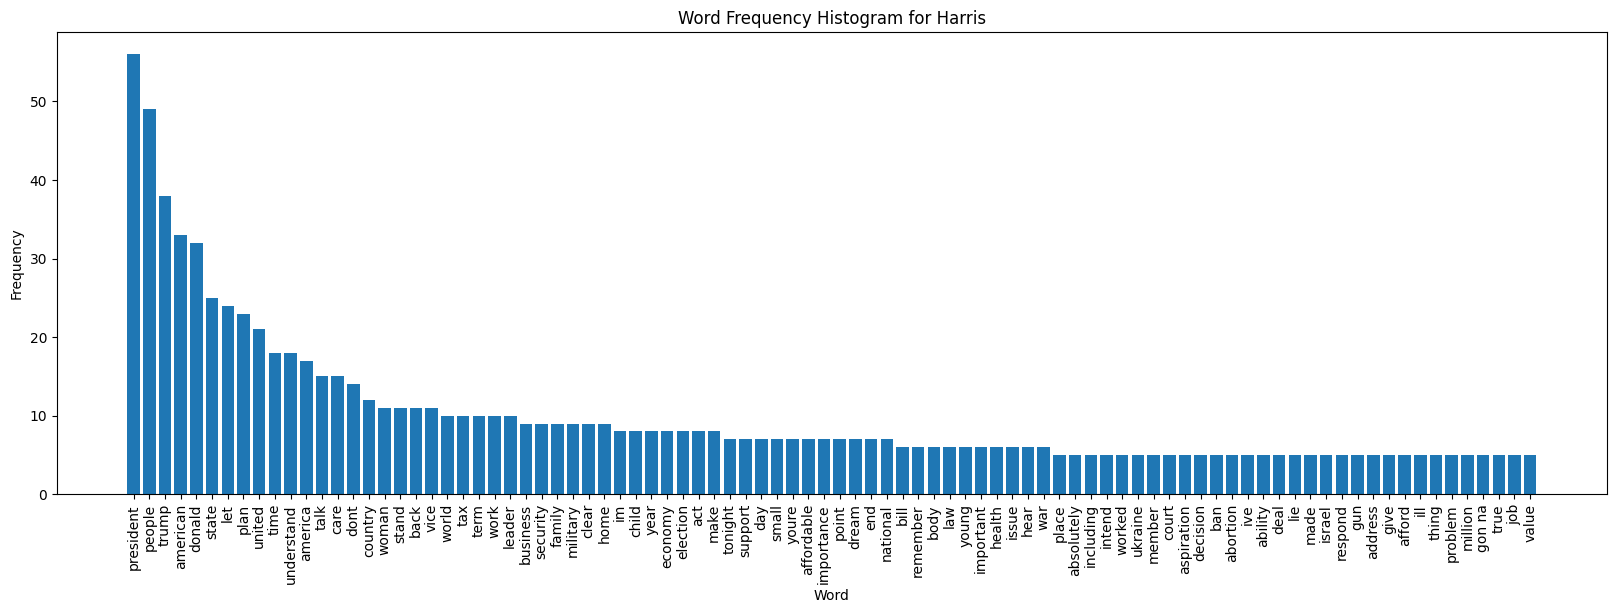

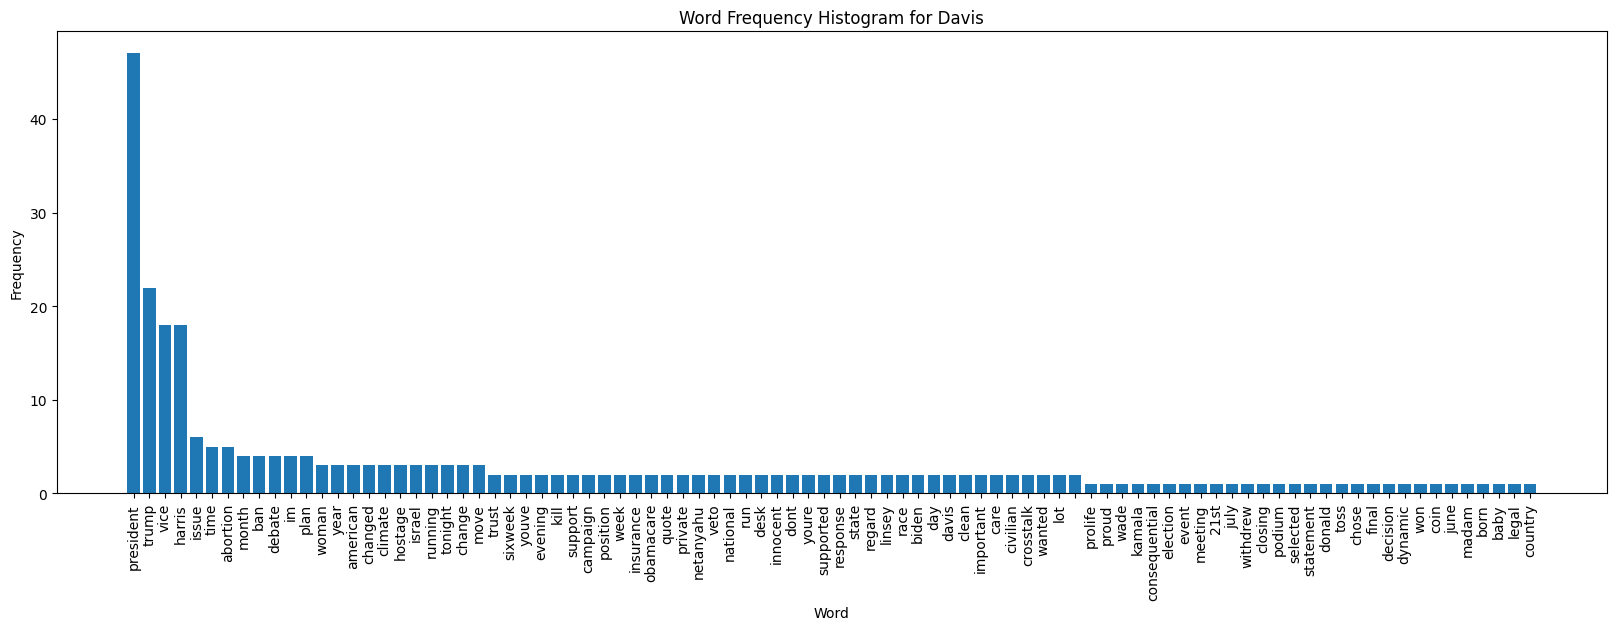

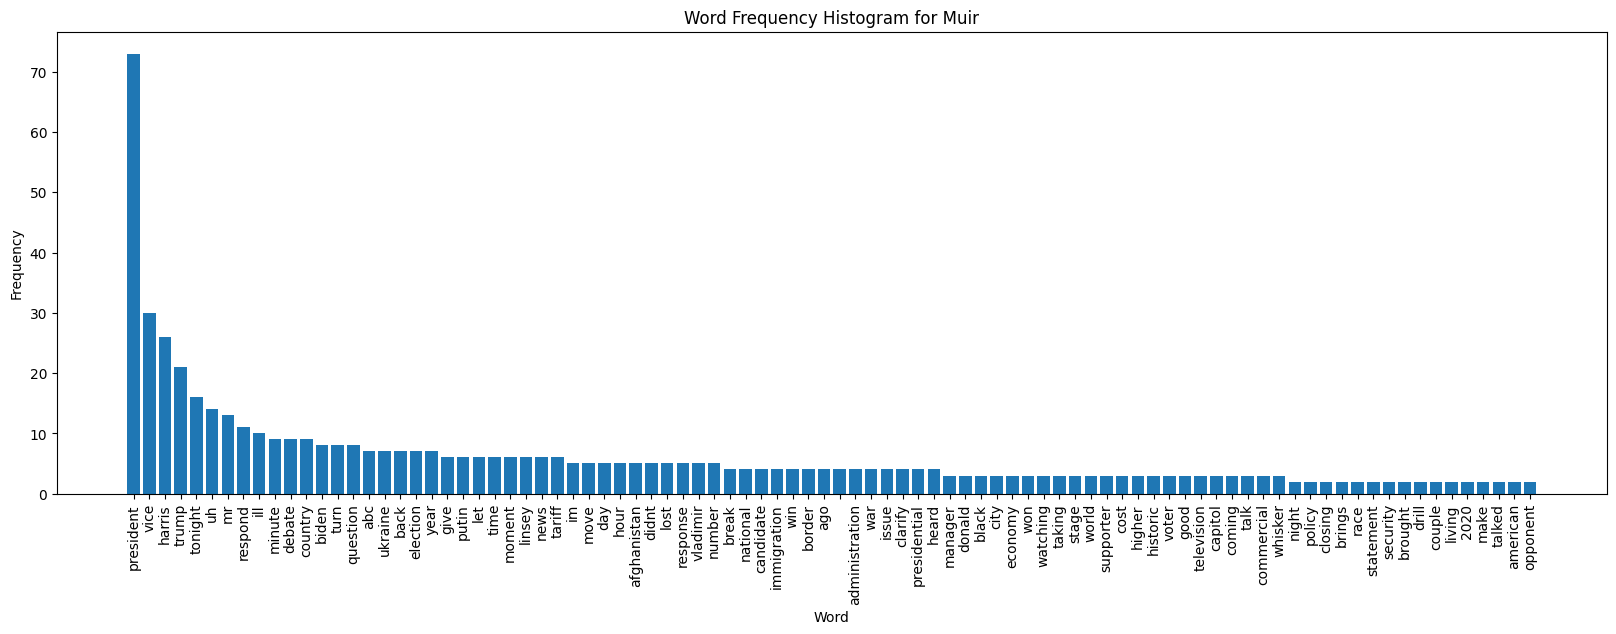

In [19]:
def create_word_frequency_histogram(df, speaker):
    word_count = Counter(df['Token'].sum())
    word_count_df = pd.DataFrame(word_count.items(), columns=['Word', 'Count'])
    word_count_df = word_count_df.sort_values('Count', ascending=False)
    plt.figure(figsize=(20, 6))
    plt.bar(word_count_df['Word'][:90], word_count_df['Count'][:90])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(f'Word Frequency Histogram for {speaker}')
    plt.xticks(rotation=90)
    plt.show()

# Create a word frequency histogram for each speaker
for df, speaker in zip([trump_df, harris_df, davis_df, muir_df], ['Trump', 'Harris', 'Davis', 'Muir']):
    create_word_frequency_histogram(df, speaker)


## **Q8.** Sentiment Analysis of Trump vs. Harris Debate

In this task, we will use the **VADER sentiment analysis tool** to evaluate the sentiment of the debate.

### Steps to Follow:
1. **Filter the Text**:  
   - Include only **candidate responses** by removing any **moderator text** from the analysis.

2. **Analyze Sentiment**:  
   - Use VADER to calculate the **sentiment score** for each text blurp belonging to the candidates.

3. **Create a New Column**:  
   - Add a new column in the **full transcript dataframe** to store the **sentiment score** for each blurp.

4. **Save the New Dataframe**:  
   - Store this modified dataframe as a **separate data structure**.

5. **Visualize Sentiment**:  
   - Create a **visualization** showing the **sentiment score** of each blurp for each candidate.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\1553547802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_response['Sentiment'] = candidate_response['text_process'].apply(lambda x: sid.polarity_scores(x)['compound'])


<Axes: xlabel='Speaker'>

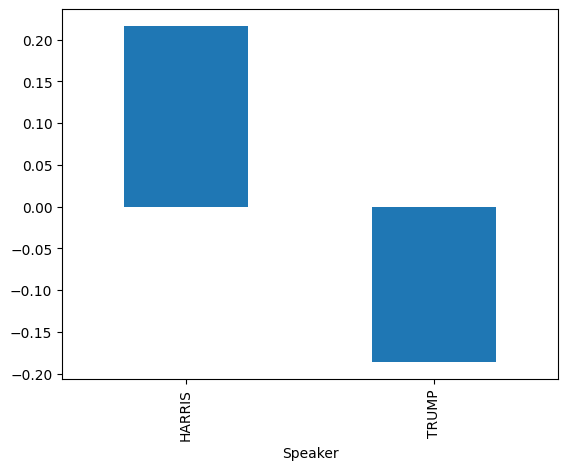

In [28]:
# Filter the candidate responses
from turtle import color


candidate_response = transcript_df[transcript_df['Speaker'].isin(['TRUMP', 'HARRIS'])]

# Calculate sentiment scores for each text with VADER
sid = SentimentIntensityAnalyzer()
candidate_response['Sentiment'] = candidate_response['text_process'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Create a visualization for the sentiment scores
candidate_response.groupby('Speaker')['Sentiment'].mean().plot(kind='bar')

## **Q9.** Embeddings
Use the **embedding model** provided through `Langchain`'s `HuggingFaceEmbeddings()` to encode the **untokenized text** for each candidate from the data frames.

### Steps:
1. **Embed Each Candidate’s Speech**:
   - For every row in the candidate data frames, embed the untokenized text using the embedding model.
   - Return the embeddings in a **list** format.

2. **Create a Query**:
   - Use the text:  
     > *"I am the Best president in the history of the United States."*

3. **Embed the Query**:
   - Embed the query text using the same model.

4. **Find the Most Relevant Document**:
   - Use **cosine similarity** to compare the **query embedding** with each candidate’s **speech embeddings**.
   - Determine which speech is **most similar** to the query.

In [37]:
# Embed the text using HuggingFace and MiniLM-L6-v2 model
embedder = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
for df in [trump_df, harris_df]:
    df['Embedding'] = df['text_process'].apply(lambda text: embedder.embed_documents([text])[0])

# Return the embedding as a list for each speaker
trump_embeddings = trump_df['Embedding'].tolist()
harris_embeddings = harris_df['Embedding'].tolist()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30280\2437862288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embedding'] = df['text_process'].apply(lambda text: embedder.embed_documents([text])[0])


In [38]:
# Establish a query and embed the query 
query = "I am the Best president in the history of the United States."
query_embedding = embedder.embed_documents([query])[0]


In [43]:
# Calculate the cosine similarity between the query and each of the speaker's responses
trump_similarity = cosine_similarity([query_embedding], trump_embeddings)
harris_similarity = cosine_similarity([query_embedding], harris_embeddings)

print(f"The average cosine similarity between the query and Trump's responses is: {trump_similarity.mean()}")
print(f"The average cosine similarity between the query and Harris's responses is: {harris_similarity.mean()}")

# Find the most similar response and the original text with the index
trump_most_similar = trump_df.iloc[trump_similarity.argmax()]
harris_most_similar = harris_df.iloc[harris_similarity.argmax()]

print("The most similar response from Trump is:")
pprint(trump_most_similar['Text'])
print(f"The cosine similarity is: {trump_similarity.max()}")
print("\n")
print("The most similar response from Harris is:")
pprint(harris_most_similar['Text'])
print(f"The cosine similarity is: {harris_similarity.max()}")

The average cosine similarity between the query and Trump's responses is: 0.1493033095618366
The average cosine similarity between the query and Harris's responses is: 0.2346727853668378
The most similar response from Trump is:
(" This is the most divisive presidency in the history of our country. There's "
 "never been anything like it. They're destroying our country. And they come "
 'up with things like what she just said going back many, many years when a '
 'lot of people including Mayor Bloomberg agreed with me on the Central Park '
 'Five. They admitted--they said, they pled guilty. And I said, well, if they '
 'pled guilty they badly hurt a person, killed a person ultimately. And if '
 "they pled guilty--then they pled we're not guilty. But this is a person that "
 "has to stretch back years, 40, 50 years ago because there's nothing now. I "
 "built one of the greatest economies in the history of the world and I'm "
 "gonna build it again. It's going to be bigger, better and st

### 🟢 IMPORTANT: Final Checks

Before you submit your homework, please ensure that:
- Your complete homework **runs without errors** from top to bottom.  
  💡 **Tip**: Use the **Run All** feature to quickly check this.
  
---

## 📤 Submission Instructions

Submit your completed assignment in both of the following formats:
1. **.IPYNB** (Jupyter Notebook format)
2. **.HTML** (Webpage format)

Upload your files to **Canvas** before the deadline.